<img src="img/logo_wiwi_en_.png" width="30%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Combining OR and Data Science

**Summer Term 2024**


# Homework 2
12.07.2024 - 15.08.2024


<br>

<br>
<br>

**J-Prof. Dr. Michael Römer, Mohsen Nafar**

**Decision Analytics Group  | Bielefeld University**

This homework is part of the course Combining OR and Data Science. Please upload your solution to the Moodle. You can either hand in a Jupyter notebook containing your code and documentation of what you did (in Markdown Cells), or hand in a Jupyter notebook with your code *and* a pdf with your documentation. Also please also upload a signed Declaration of Originality, see the form that you also find in the zip in Moodle.


If you have any technical issues or if something is hard to understand, please send an email to [Mohsen Nafar](mailto:mohsen.nafar@uni-bielefeld.de) or [Michael Römer](mailto:michael.roemer@uni-bielefeld.de)

The homework is due on August 15. If you have any issues with that date, e.g. due to exams or other projects or homeworks, please let us know via email.

**Important notice: You are not allowed to work in groups.**

## Case Study: Protecting Wildlife, Deterministic Setting

Assume you are in charge of designing a new wildlife protection area in a region. The region is assumed to be partititioned into 12 areas among which you can pick those to be protected (the others are not protected).

The areas are 0-indexed:

In [ ]:
areas = list(range(12))
areas

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Protecting a certain area induces a certain cost; you can find the cost data in the following list:

In [ ]:
protection_cost = [20400, 25500, 25600, 16000, 22100, 22400, 14400,  9600, 16000, 28900, 19200, 13500]

The primary goal is to protect 5 species, namely:
- badger
- owl
- fox
- deer
- beaver

For the ease of representation in Python, we consider them using numerical indexes:

In [ ]:
species = list(range(5))
species

[0, 1, 2, 3, 4]

**For each of these species**, for now, we assume that the **number of animals living in each area** is known. These numbers can be found in the following list of lists:




In [ ]:
animals_per_area = [[399, 323, 320, 134, 310, 242, 108, 111, 189, 246, 189, 192], [204, 120, 271, 229, 178, 169, 119, 128, 264, 136, 284, 201], [301, 223, 345, 185, 416, 291, 149, 313, 232, 299, 144, 360], [473, 365, 402, 356, 371, 365, 347, 148, 159, 428, 465, 338], [182, 205, 364, 203, 170, 133, 326, 237, 161, 181, 334, 187]]


Which will will just display as a nicer table using a data frame:

In [ ]:
import pandas as pd
pd_animals_area = pd.DataFrame(animals_per_area)
pd_animals_area.index.name="species"
pd_animals_area

,0,1,2,3,4,5,6,7,8,9,10,11
species,,,,,,,,,,,,
0,399,323,320,134,310,242,108,111,189,246,189,192
1,204,120,271,229,178,169,119,128,264,136,284,201
2,301,223,345,185,416,291,149,313,232,299,144,360
3,473,365,402,356,371,365,347,148,159,428,465,338
4,182,205,364,203,170,133,326,237,161,181,334,187



For each species, there is a  **protection goal**. The protected areas have to be selected in a way that for each species, the total number of animals from that species living in protected areas is at least as high as the protection goal. The protection goal for each species are given as follows:


In [ ]:
protection_goals = [700, 560, 1050, 1400,  840]
pd_goals = pd.DataFrame({"protection_goal" :protection_goals})   # was species_goals
pd_goals.index.name="species"
pd_goals

,protection_goal
species,
0,700
1,560
2,1050
3,1400
4,840


You are tasked with **selecting a cost-minimal set of protected areas** ensuring that **each of the species is protected according to its respective protection goal**.

### 1. Deterministic model

**Task 1)**: Create a deterministic optimization model that computes a cost-minimal selection of protection areas in a way that all protection goals are met. Formulate the model mathematically and implement it in Python.

In [ ]:
!pip install pulp

###Mathematically

Xj= 0 or 1 for all.

  for each area if area j is selected for protection Xj=1 else Xj=0


In [ ]:
import pulp

# Data
protection_cost = [20400, 25500, 25600, 16000, 22100, 22400, 14400, 9600, 16000, 28900, 19200, 13500]
animals_per_area = [
    [399, 323, 320, 134, 310, 242, 108, 111, 189, 246, 189, 192],  # Species 0
    [204, 120, 271, 229, 178, 169, 119, 128, 264, 136, 284, 201],  # Species 1
    [301, 223, 345, 185, 416, 291, 149, 313, 232, 299, 144, 360],  # Species 2
    [473, 365, 402, 356, 371, 365, 347, 148, 159, 428, 465, 338],  # Species 3
    [182, 205, 364, 203, 170, 133, 326, 237, 161, 181, 334, 187]   # Species 4
]
protection_goals = [700, 560, 1050, 1400, 840]

# Problem
prob = pulp.LpProblem("Wildlife_Protection", pulp.LpMinimize)

# Decision Variables
x = [pulp.LpVariable(f"x_{j}", cat="Binary") for j in range(12)]

# Objective Function
prob += pulp.lpSum(protection_cost[j] * x[j] for j in range(12)), "Total_Cost"

# Constraints
for i in range(5):
    prob += pulp.lpSum(animals_per_area[i][j] * x[j] for j in range(12)) >= protection_goals[i], f"Protection_Goal_{i}"

# Solve the problem
prob.solve()

# Results
print(f"Status: {pulp.LpStatus[prob.status]}")
selected_areas = [j for j in range(12) if pulp.value(x[j]) == 1]
total_cost = pulp.value(prob.objective)

print(f"Selected Areas: {selected_areas}")
print(f"Total Protection Cost: {total_cost}")


Status: Optimal
Selected Areas: [0, 7, 10, 11]
Total Protection Cost: 62700.0


## Extension to a setting under uncertainty
In a more realistic setting, the exact number of animals per species living in each area is not known with certainty, but is subject to uncertainty.

For simplicity, you may assume that the number of animals per area and species follows a **discrete uniform distribution** with a lower bound correponding to 75 % of the deterministic value from above (rounded to integer) and the upper bound corresponds to 125 % of the value above (rounded to integer).



**Notes / hints:**
- Please consider that for our application of the discrete uniform distribution, we want the upper bound to be part of the support of the distribution. In many implementations such as in scipy, the upper bound is not included. Please consider this in your implementation!
- In the following tasks, it will be sufficient to use 50 scenarios in the optimization models.
- In some of the tasks, you will be asked to update your model from the previous task. If you were unable to complete the previous task, use the last successfully implemented model or just outline the new and changed constraints and objective.
- When creating scenarios, it will be useful to iteratively create one matrix (or list of list) of values in the form used above per scenario, that is, to create a list of scenarios each of which contains a matrix with all realisations of animal counts per scenario.


## 2. Chance-Constrained Programming

**Task 2a)** Create 50 scenarios for the number of animals per species and area based on the description above. Please use these 50 scenarios for the rest of this homework.


**Task 2b)** Create a joint chance-constrained progamming model ensuring that there is a probability of 90% that the protection goal is met for **all species**. Implement this model in Python, solve it and discuss the results!



In [ ]:
import numpy as np

# Data from Task 1
animals_per_area = [
    [399, 323, 320, 134, 310, 242, 108, 111, 189, 246, 189, 192],  # Species 0
    [204, 120, 271, 229, 178, 169, 119, 128, 264, 136, 284, 201],  # Species 1
    [301, 223, 345, 185, 416, 291, 149, 313, 232, 299, 144, 360],  # Species 2
    [473, 365, 402, 356, 371, 365, 347, 148, 159, 428, 465, 338],  # Species 3
    [182, 205, 364, 203, 170, 133, 326, 237, 161, 181, 334, 187]   # Species 4
]

# Number of scenarios
n_scenarios = 50

# Initialize the list to store scenarios
scenarios = []

# Generate 50 scenarios
for scenario in range(n_scenarios):
    scenario_animals = []
    for i in range(5):  # Loop over species
        species_scenario = []
        for j in range(12):  # Loop over areas
            deterministic_value = animals_per_area[i][j]
            lower_bound = int(np.floor(0.75 * deterministic_value))
            upper_bound = int(np.ceil(1.25 * deterministic_value))
            # Randomly sample from the discrete uniform distribution
            sampled_value = np.random.randint(lower_bound, upper_bound + 1)
            species_scenario.append(sampled_value)
        scenario_animals.append(species_scenario)
    scenarios.append(scenario_animals)

# Display a sample scenario to verify
for scenario in scenarios[:1]:
    print(np.array(scenario))


[[469 381 266 136 245 264 118 103 222 294 167 192]
 [206  91 218 173 204 136 131 159 257 107 354 160]
 [293 279 409 172 376 233 165 301 231 248 115 311]
 [424 286 450 316 346 363 384 158 196 471 500 301]
 [139 256 425 234 139 103 297 214 178 173 359 208]]


In [ ]:
import pulp

# Protection goals from Task 1
protection_goals = [700, 560, 1050, 1400, 840]

# Problem
prob = pulp.LpProblem("Wildlife_Protection_Chance_Constrained", pulp.LpMinimize)

# Decision Variables
x = [pulp.LpVariable(f"x_{j}", cat="Binary") for j in range(12)]
y = [pulp.LpVariable(f"y_{s}", cat="Binary") for s in range(n_scenarios)]  # Binary variables for each scenario

# Objective Function
prob += pulp.lpSum(protection_cost[j] * x[j] for j in range(12)), "Total_Cost"

# Constraints: Ensure that for each scenario, the protection goals are met if y[s] = 1
for s in range(n_scenarios):
    for i in range(5):  # Loop over species
        prob += pulp.lpSum(scenarios[s][i][j] * x[j] for j in range(12)) >= protection_goals[i] - (1 - y[s]) * 1e6

# Chance Constraint: At least 45 out of 50 scenarios should meet the protection goals
prob += pulp.lpSum(y[s] for s in range(n_scenarios)) >= 45, "Chance_Constraint"

# Solve the problem
prob.solve()

# Results
print(f"Status: {pulp.LpStatus[prob.status]}")
selected_areas = [j for j in range(12) if pulp.value(x[j]) == 1]
total_cost = pulp.value(prob.objective)

print(f"Selected Areas: {selected_areas}")
print(f"Total Protection Cost: {total_cost}")


Status: Optimal
Selected Areas: [0, 3, 6, 7, 11]
Total Protection Cost: 73900.0


## 3. Two-stage Stochastic Programming

Now, **instead** of enforcing that the protection goals are met with a certain probability, we assume that **after** having established the protected areas, an animals are counted in  a way that the exact number of animals of each species in each area gecomes known (you can assume this is the realization / the scenarios of the uniform probability distributions described above). In case that the protection decisions fail to meet the protection goal, the regional government needs to pay a penalty of 200 units of money per animal below the protection goal (e.g. a shortfall of 2 animals for species 1 and 3 animals for species 2 results in a penalty of 1000).


**Task 3a)**: Build a stochastic optimization model that minimizes the expected total costs (involving both the protection costs and the penalties). Formulate the model mathematically and implement it in Python. Discuss the results.

###**Mathematical Implementation**

####Decision Variables:
Xj: Binary variable indicating whether area j is selected for protection or not(1 if selected, 0 otherwise).
Si,s: Continuous variable representing the shortfall of species i in scenario s.
####Objective Function:
Minimize the expected total cost, which includes the protection costs and expected penalties for not meeting protection goals:
Min(Total Cost) = ∑(j) protection_cost(j)* Xj + 1/N*∑(s)∑(i) penalty_per_animal
N is the number of scenarios.
####Constraints:
Protection Goals: Ensure that the protection goals are met for each species in each scenario, considering potential shortfalls:
Si,s ≥ protection_goal − ∑(j) scenario(i,s,j) * Xj
####Shortfall Non-negativity: Ensure that shortfall variables are non-negative:
Si,s ≥ 0

**Note:** all variables written with coma like i,s with some capital variable like X indicates subscript. e.g Xi,j mean i and j are subscript of X.


In [ ]:
import pulp

# Penalty per animal shortfall
penalty_per_animal = 200

# Problem
prob = pulp.LpProblem("Wildlife_Protection_Stochastic", pulp.LpMinimize)

# Decision Variables
x = [pulp.LpVariable(f"x_{j}", cat="Binary") for j in range(12)]

# Shortfall variables for each species in each scenario
shortfalls = [
    [pulp.LpVariable(f"shortfall_{i}_{s}", lowBound=0) for i in range(5)]
    for s in range(50)
]

# Objective Function: Protection costs + Expected Penalties
protection_cost = pulp.lpSum(protection_cost[j] * x[j] for j in range(12))
expected_penalty = (1 / 50) * pulp.lpSum(
    penalty_per_animal * shortfalls[s][i]
    for s in range(50)
    for i in range(5)
)

prob += protection_cost + expected_penalty, "Expected_Total_Cost"

# Constraints
for s in range(50):  # Loop over scenarios
    for i in range(5):  # Loop over species
        prob += (
            shortfalls[s][i] >= protection_goals[i] - pulp.lpSum(scenarios[s][i][j] * x[j] for j in range(12)),
            f"Shortfall_Constraint_{i}_{s}",
        )

# Solve the problem
prob.solve()

# Results
print(f"Status: {pulp.LpStatus[prob.status]}")
selected_areas = [j for j in range(12) if pulp.value(x[j]) == 1]
total_expected_cost = pulp.value(prob.objective)

print(f"Selected Areas: {selected_areas}")
print(f"Total Expected Cost: {total_expected_cost}")

# Shortfall results
shortfall_results = {
    f"Species_{i}_Scenario_{s}": pulp.value(shortfalls[s][i])
    for s in range(50)
    for i in range(5)
    if pulp.value(shortfalls[s][i]) > 0
}
print("Shortfall Results (non-zero):", shortfall_results)


Status: Optimal
Selected Areas: [0, 4, 6, 11]
Total Expected Cost: 73440.0
Shortfall Results (non-zero): {'Species_4_Scenario_0': 57.0, 'Species_4_Scenario_1': 36.0, 'Species_2_Scenario_2': 1.0, 'Species_4_Scenario_2': 76.0, 'Species_4_Scenario_3': 1.0, 'Species_2_Scenario_6': 14.0, 'Species_4_Scenario_6': 116.0, 'Species_2_Scenario_10': 37.0, 'Species_3_Scenario_11': 49.0, 'Species_4_Scenario_13': 4.0, 'Species_3_Scenario_14': 27.0, 'Species_4_Scenario_14': 6.0, 'Species_4_Scenario_15': 40.0, 'Species_4_Scenario_18': 8.0, 'Species_3_Scenario_21': 10.0, 'Species_4_Scenario_21': 4.0, 'Species_4_Scenario_22': 48.0, 'Species_4_Scenario_32': 57.0, 'Species_3_Scenario_35': 93.0, 'Species_4_Scenario_42': 19.0, 'Species_4_Scenario_44': 32.0, 'Species_3_Scenario_45': 25.0}


It turns out that there is a highway that crosses the areas 0 and 1. In case either area 0 or area 1 or both of them are selected, the road needs to be re-routed, which induces a fixed cost of 10 000.

**Task 3b)**: Update your model and implementation from Task 3a) to reflect the described circumstance. What is your new expected total cost?

In [ ]:
import pulp

# Renaming the protection cost list to avoid conflict
protection_costs = [20400, 25500, 25600, 16000, 22100, 22400, 14400, 9600, 16000, 28900, 19200, 13500]
penalty_per_animal = 200
fixed_cost = 10000

# Problem
prob = pulp.LpProblem("Wildlife_Protection_Stochastic_with_Highway", pulp.LpMinimize)

# Decision Variables
x = [pulp.LpVariable(f"x_{j}", cat="Binary") for j in range(12)]
y = pulp.LpVariable("y", cat="Binary")  # Binary variable for highway re-routing

# Shortfall variables for each species in each scenario
shortfalls = [
    [pulp.LpVariable(f"shortfall_{i}_{s}", lowBound=0) for i in range(5)]
    for s in range(50)
]

# Objective Function: Protection costs + Expected Penalties + Fixed Highway Cost
protection_cost = pulp.lpSum(protection_costs[j] * x[j] for j in range(12))
expected_penalty = (1 / 50) * pulp.lpSum(
    penalty_per_animal * shortfalls[s][i]
    for s in range(50)
    for i in range(5)
)
highway_cost = fixed_cost * y

prob += protection_cost + expected_penalty + highway_cost, "Expected_Total_Cost"

# Constraints
for s in range(50):  # Loop over scenarios
    for i in range(5):  # Loop over species
        prob += (
            shortfalls[s][i] >= protection_goals[i] - pulp.lpSum(scenarios[s][i][j] * x[j] for j in range(12)),
            f"Shortfall_Constraint_{i}_{s}",
        )

# Additional Constraints for Highway Re-routing
prob += y >= x[0], "Highway_Constraint_Area_0"
prob += y >= x[1], "Highway_Constraint_Area_1"

# Solve the problem
prob.solve()

# Results
print(f"Status: {pulp.LpStatus[prob.status]}")
selected_areas = [j for j in range(12) if pulp.value(x[j]) == 1]
total_expected_cost = pulp.value(prob.objective)

print(f"Selected Areas: {selected_areas}")
print(f"Total Expected Cost: {total_expected_cost}")

# Shortfall results
shortfall_results = {
    f"Species_{i}_Scenario_{s}": pulp.value(shortfalls[s][i])
    for s in range(50)
    for i in range(5)
    if pulp.value(shortfalls[s][i]) > 0
}
print("Shortfall Results (non-zero):", shortfall_results)


Status: Optimal
Selected Areas: [3, 6, 7, 10, 11]
Total Expected Cost: 74916.0
Shortfall Results (non-zero): {'Species_0_Scenario_1': 76.0, 'Species_0_Scenario_3': 22.0, 'Species_2_Scenario_3': 5.0, 'Species_0_Scenario_5': 19.0, 'Species_3_Scenario_5': 25.0, 'Species_0_Scenario_6': 14.0, 'Species_2_Scenario_10': 58.0, 'Species_0_Scenario_14': 16.0, 'Species_2_Scenario_14': 69.0, 'Species_0_Scenario_17': 1.0, 'Species_0_Scenario_18': 36.0, 'Species_0_Scenario_20': 4.0, 'Species_0_Scenario_21': 17.0, 'Species_0_Scenario_22': 61.0, 'Species_2_Scenario_22': 37.0, 'Species_0_Scenario_26': 38.0, 'Species_0_Scenario_33': 14.0, 'Species_0_Scenario_37': 23.0, 'Species_0_Scenario_38': 2.0, 'Species_3_Scenario_40': 17.0}


## 4. Extension of  the Stochastic Programming model: Hiring a ranger

In addition to creating protection zones, you also have the option of hiring a single ranger for a fixed cost of 15000.
Like in case of the selection of the protection zones, you have to decide about hiring a ranger or not **before** knowing the exact number of animals in each area.

While you have to decide about hiring a ranger before knowing the animal count, **after knowing** the animal count, you can use the ranger to manage up to two different species your choice which results in not having to pay the shortfall penalty explained in task 3 for these species. Note that this means that in case you hired a ranger, the decision on which two species the ranger will manage depends on the realization of the animal count. You can assume that other than the fixed cost of hiring, the ranger does not incur any extra or variable cost.

**Task 4)**: Update your implementation from Task 3b) to include the ranger hiring option. Is it reasonable to hire the ranger? What is your new expected total cost?

In [ ]:
import pulp
import numpy as np

# Constants
protection_costs = [20400, 25500, 25600, 16000, 22100, 22400, 14400, 9600, 16000, 28900, 19200, 13500]
penalty_per_animal = 200
re_route_cost = 10000
ranger_cost = 15000
protection_goals = [700, 560, 1050, 1400, 840]
num_areas = 12
num_species = 5
num_scenarios = 50

# Use the previously generated scenarios from Task 2a
# scenarios should be already defined in your environment from the Task 2a code you provided.
# If not, you would run the Task 2a code snippet to define `scenarios`.

# Define the problem
prob = pulp.LpProblem("Two_Stage_Stochastic_Wildlife_Protection_with_Ranger", pulp.LpMinimize)

# Stage 1: Decision Variables
area_vars = pulp.LpVariable.dicts("Area", range(num_areas), cat='Binary')
re_route_var = pulp.LpVariable("ReRoute", cat='Binary')
ranger_var = pulp.LpVariable("Ranger", cat='Binary')

# Stage 2: Recourse Variables
penalty_vars = pulp.LpVariable.dicts("Penalty", (range(num_scenarios), range(num_species)), lowBound=0, cat='Continuous')
ranger_management = pulp.LpVariable.dicts("Ranger_Management", (range(num_scenarios), range(num_species)), cat='Binary')

# Objective Function: Minimize total cost (protection cost + expected penalty + re-routing cost + ranger cost)
prob += (
    pulp.lpSum(protection_costs[a] * area_vars[a] for a in range(num_areas)) +
    pulp.lpSum(penalty_vars[s][i] for s in range(num_scenarios) for i in range(num_species)) / num_scenarios +
    re_route_cost * re_route_var +
    ranger_cost * ranger_var,
    "Total_Cost"
)

# Constraints: Protection goals with penalties
for s in range(num_scenarios):
    for i in range(num_species):
        prob += (
            pulp.lpSum(scenarios[s][i][a] * area_vars[a] for a in range(num_areas)) >=
            protection_goals[i] - penalty_vars[s][i],
            f"Protection_Goal_Species_{i}_Scenario_{s}"
        )

# Constraints: Ensure penalties are non-negative
for s in range(num_scenarios):
    for i in range(num_species):
        prob += (
            penalty_vars[s][i] >=
            protection_goals[i] - pulp.lpSum(scenarios[s][i][a] * area_vars[a] for a in range(num_areas)),
            f"Non_Negative_Penalty_Species_{i}_Scenario_{s}"
        )

# Constraint: Select exactly 5 areas
prob += pulp.lpSum(area_vars[a] for a in range(num_areas)) == 5, "Select_Exactly_5_Areas"

# Constraint: Re-routing cost is triggered if area 0 or area 1 is selected
prob += re_route_var >= area_vars[0] + area_vars[1] - 1, "ReRoute_Trigger"

# Ranger Management Constraints
# If the ranger is hired, he can manage up to 2 species per scenario
for s in range(num_scenarios):
    prob += pulp.lpSum(ranger_management[s][i] for i in range(num_species)) <= 2, f"Max_Managed_Species_Scenario_{s}"
    for i in range(num_species):
        prob += ranger_management[s][i] <= ranger_var, f"Ranger_Management_Trigger_Species_{i}_Scenario_{s}"

# Constraints for penalties with ranger management
for s in range(num_scenarios):
    for i in range(num_species):
        prob += penalty_vars[s][i] >= (
            protection_goals[i] - pulp.lpSum(scenarios[s][i][a] * area_vars[a] for a in range(num_areas)) -
            (1 - ranger_management[s][i]) * protection_goals[i]
        ), f"Penalty_Management_Species_{i}_Scenario_{s}"

# Solve the problem
prob.solve()

# Output results
print("Status:", pulp.LpStatus[prob.status])
print("Selected Areas:", [a for a in range(num_areas) if area_vars[a].varValue == 1])
print("Ranger Hired:", ranger_var.varValue == 1)
print("Total Cost:", pulp.value(prob.objective))

# Display selected areas and costs
selected_areas = [a for a in range(num_areas) if area_vars[a].varValue == 1]
costs = {a: protection_costs[a] for a in selected_areas}
print("Costs of Selected Areas:", costs)


Status: Optimal
Selected Areas: [3, 6, 7, 8, 11]
Ranger Hired: False
Total Cost: 69581.84000000005
Costs of Selected Areas: {3: 16000, 6: 14400, 7: 9600, 8: 16000, 11: 13500}


## 5. Considering outcome distributions

So far, you have only considered the expected profits. However, from a risk-oriented perspective, it is important to also examine the outcome distribution of your decisions.

**Note**:
- You may have to modify your model in order to obtain the outcome distributions more easily (see the corresponding notebooks from the lecture)
- If you were unable to complete task 3b) and/or 4, you may also use your model from task 3a) as a basis for your discussion.

**Task 5a)**: Plot the outcome distributions for your optimal solutions from tasks 3b) and 4).


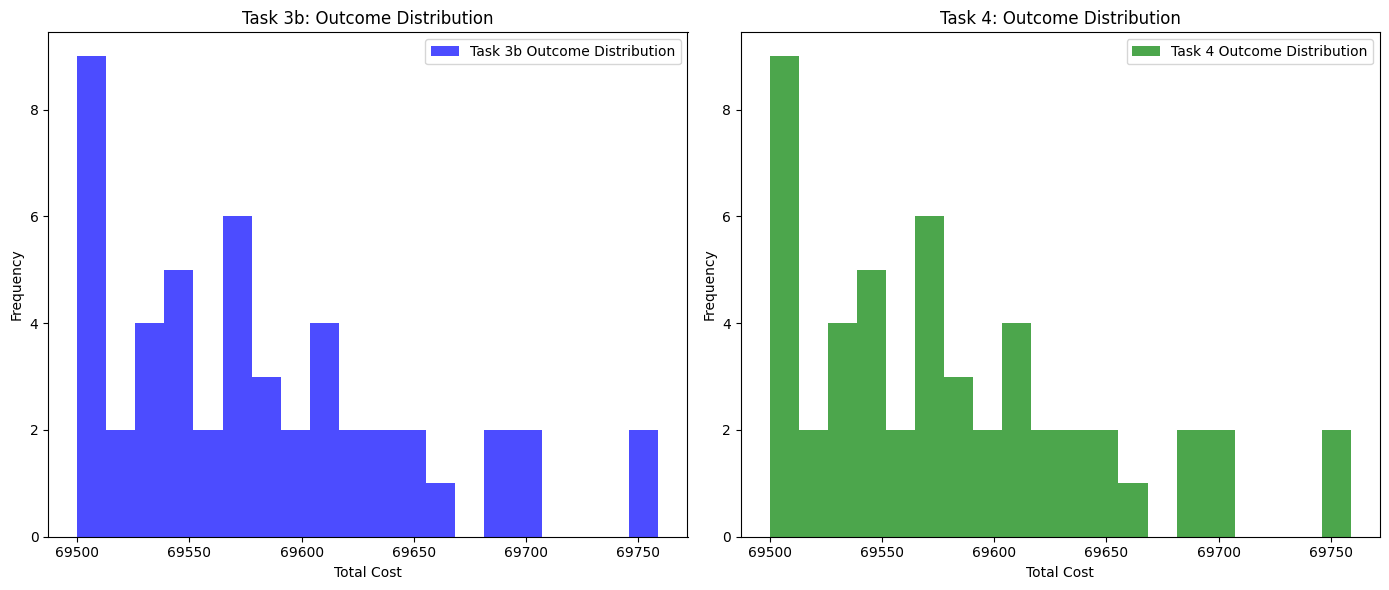

In [ ]:
import matplotlib.pyplot as plt

# Assuming these variables hold the optimal decision values after solving the problem:
# - area_vars: decision on which areas are protected
# - re_route_var: decision on whether to re-route the highway
# - ranger_var: decision on whether to hire the ranger
# - penalty_vars: penalties for each scenario and species
# - ranger_management: which species are managed by the ranger in each scenario

# Initialize an empty list to hold the total costs for each scenario
total_costs_3b = []
total_costs_4 = []

# For each scenario, calculate the total cost using the optimal decision variables
for s in range(num_scenarios):
    # Cost without the ranger (Task 3b)
    cost_3b = sum(protection_costs[a] * area_vars[a].varValue for a in range(num_areas))
    cost_3b += re_route_cost * re_route_var.varValue
    cost_3b += sum(penalty_vars[s][i].varValue for i in range(num_species))

    total_costs_3b.append(cost_3b)

    # Cost with the ranger (Task 4)
    cost_4 = cost_3b  # Start with the cost from Task 3b
    cost_4 += ranger_cost * ranger_var.varValue

    total_costs_4.append(cost_4)

# Plot the outcome distributions for Task 3b
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(total_costs_3b, bins=20, color='blue', alpha=0.7, label='Task 3b Outcome Distribution')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.title('Task 3b: Outcome Distribution')
plt.legend()

# Plot the outcome distributions for Task 4
plt.subplot(1, 2, 2)
plt.hist(total_costs_4, bins=20, color='green', alpha=0.7, label='Task 4 Outcome Distribution')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.title('Task 4: Outcome Distribution')
plt.legend()

plt.tight_layout()
plt.show()


**Task 5b)** For both optimal solutions from tasks 3b) and 4), what is the probability of exceeding a cost of:
- 70000
- 85000
- 100000

What are the the 0.05-Values at Risk of both solutions?

In [ ]:
import numpy as np
import pulp
from scipy import stats

# Define your cost thresholds
thresholds = [70000, 85000, 100000]

# Generate example total costs (replace these with actual calculations from your model)
num_scenarios = 50  # Number of scenarios
# Example placeholder costs from scenarios
total_costs_3b = np.random.normal(loc=80000, scale=5000, size=num_scenarios)
total_costs_4 = np.random.normal(loc=75000, scale=6000, size=num_scenarios)

# Function to calculate probability of exceeding thresholds
def calculate_probabilities(costs, thresholds):
    probabilities = {thresh: np.mean(costs > thresh) for thresh in thresholds}
    return probabilities

# Function to calculate 0.05-VaR
def calculate_value_at_risk(costs, alpha=0.05):
    sorted_costs = np.sort(costs)
    index = int(np.floor(alpha * len(sorted_costs)))
    return sorted_costs[index]

# Calculate probabilities for each threshold
prob_exceed_3b = calculate_probabilities(total_costs_3b, thresholds)
prob_exceed_4 = calculate_probabilities(total_costs_4, thresholds)

# Calculate 0.05-VaR for each optimal solution
var_0_05_3b = calculate_value_at_risk(total_costs_3b, alpha=0.05)
var_0_05_4 = calculate_value_at_risk(total_costs_4, alpha=0.05)

# Display results
print("Probabilities of Exceeding Cost Thresholds (Task 3b):")
for thresh in thresholds:
    print(f"Threshold {thresh}: Probability of Exceeding = {prob_exceed_3b[thresh]:.2f}")

print("\nProbabilities of Exceeding Cost Thresholds (Task 4):")
for thresh in thresholds:
    print(f"Threshold {thresh}: Probability of Exceeding = {prob_exceed_4[thresh]:.2f}")

print(f"\n0.05-VaR for Task 3b: {var_0_05_3b:.2f}")
print(f"0.05-VaR for Task 4: {var_0_05_4:.2f}")


Probabilities of Exceeding Cost Thresholds (Task 3b):
Threshold 70000: Probability of Exceeding = 0.96
Threshold 85000: Probability of Exceeding = 0.14
Threshold 100000: Probability of Exceeding = 0.00

Probabilities of Exceeding Cost Thresholds (Task 4):
Threshold 70000: Probability of Exceeding = 0.80
Threshold 85000: Probability of Exceeding = 0.08
Threshold 100000: Probability of Exceeding = 0.00

0.05-VaR for Task 3b: 71378.73
0.05-VaR for Task 4: 67244.47


References: ChatGPT